# Класс Dataset

Загружаем данные

In [1]:
! wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

--2020-07-24 12:59:42--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.153.124, 13.35.153.102, 13.35.153.7, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.153.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   239MB/s    in 0.2s    

2020-07-24 12:59:42 (239 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/t

In [2]:
import os

In [3]:
print(os.getcwd())
print(os.listdir(os.path.join(os.getcwd(),r'hymenoptera_data/', 'train')))
print(os.listdir(os.path.join(os.getcwd(),r'hymenoptera_data/','train','ants')))

/content
['ants', 'bees']
['649026570_e58656104b.jpg', '275429470_b2d7d9290b.jpg', '541630764_dbd285d63c.jpg', '116570827_e9c126745d.jpg', '382971067_0bfd33afe0.jpg', '392382602_1b7bed32fa.jpg', '531979952_bde12b3bc0.jpg', '1473187633_63ccaacea6.jpg', '506249836_717b73f540.jpg', 'formica.jpeg', '1660097129_384bf54490.jpg', '998118368_6ac1d91f81.jpg', '188552436_605cc9b36b.jpg', '154124431_65460430f2.jpg', 'army-ants-red-picture.jpg', '684133190_35b62c0c1d.jpg', 'swiss-army-ant.jpg', '403746349_71384f5b58.jpg', '1095476100_3906d8afde.jpg', '196057951_63bf063b92.jpg', '424873399_47658a91fb.jpg', '474806473_ca6caab245.jpg', '82852639_52b7f7f5e3.jpg', '24335309_c5ea483bb8.jpg', 'Nepenthes_rafflesiana_ant.jpg', '466430434_4000737de9.jpg', '512863248_43c8ce579b.jpg', '258217966_d9d90d18d3.jpg', '162603798_40b51f1654.jpg', '132478121_2a430adea2.jpg', '178538489_bec7649292.jpg', '540889389_48bb588b21.jpg', '2278278459_6b99605e50.jpg', '69639610_95e0de17aa.jpg', '201558278_fe4caecc76.jpg', '535

In [10]:
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [8]:
train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) ])

data_dir = 'hymenoptera_data'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          train_transforms)
class_names = train_dataset.classes

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
inputs, classes = next(iter(train_dataloader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image

Структура:

class MyDataset(Dataset):

    def __init__(self,):
        формирование датасета
    def __getitem__(self,item):
        вернуть какой-то элемент из датасета
    def __len__(self):
        размер датасет


In [ ]:
class MyImageFolder(Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms

        self.classes = [d.name for d in os.scandir(root) if d.is_dir()]
        sorted(self.classes)
        self.class_to_idx = {classes[i]:i for i in range(len(classes))}
        self.imgs = []
        for target_dir in self.classes():
            for root_dir, _, fname in os.walk(os.path.join(self.root, target_dir)):
                path = os.path.join(root_dir, fname)
                item = path, self.class_to_idx(target_dir)
                self.imgs.append(item)
    def __len__(self):
        return len(self.imgs)

    def loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            img = img.convert('RGB')
            return img


    def __getitem__(self, index):
        item = self.imgs[index]
        path, target = item
        img = self.loader(path)
        img = self.transforms(img)
        return img, target

In [ ]:
class MyImageFolder(Dataset):
    def __init__(self,root, transform):
        self.root = root
        self.transform = transform

        self.classes = [d.name for d in os.scandir(self.root) if d.is_dir()]
        self.classes.sort()
        self.class_to_idx = {self.classes[i]:i for i in range(len(self.classes))}
        self.imgs = []
        for target_class in sorted(self.class_to_idx.keys()):
            class_index = self.class_to_idx[target_class]
            target_dir = os.path.join(self.root, target_class)
            for root_folder, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                for fname in sorted(fnames):
                    path = os.path.join(root_folder, fname)
                    item = path, class_index
                    self.imgs.append(item)


    def loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

    def __getitem__(self, item):
        path, target = self.imgs[item]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        return img, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) ])

data_dir = 'hymenoptera_data'
train_dataset = MyImageFolder(os.path.join(data_dir, 'train'),
                                          transform=train_transforms)

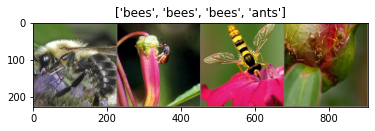

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
inputs, classes = next(iter(train_dataloader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import cv2

In [ ]:
class MyAblumentationsImageFolder(Dataset):
    def __init__(self,root, transform):
        self.root = root
        self.transform = transform

        self.classes = [d.name for d in os.scandir(self.root) if d.is_dir()]
        self.classes.sort()
        self.class_to_idx = {self.classes[i]:i for i in range(len(self.classes))}
        self.imgs = []
        for target_class in sorted(self.class_to_idx.keys()):
            class_index = self.class_to_idx[target_class]
            target_dir = os.path.join(self.root, target_class)
            for root_folder, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                for fname in sorted(fnames):
                    path = os.path.join(root_folder, fname)
                    item = path, class_index
                    self.imgs.append(item)


    def loader(self, path):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img

    def __getitem__(self, item):
        path, target = self.imgs[item]
        image = self.loader(path)
        if self.transform is not None:
            augmented = self.transform(image=image)
        return augmented['image'], target

    def __len__(self):
        return len(self.imgs)

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensor

In [ ]:
train_transforms = A.Compose([A.Resize(256, 256), 
                                A.RandomCrop(224, 224),
                                A.HorizontalFlip(),
                                A.Normalize(
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225],
                                ),
                              ToTensor()])
data_dir = 'hymenoptera_data'
train_dataset = MyAblumentationsImageFolder(os.path.join(data_dir, 'train'),
                                          transform=train_transforms)

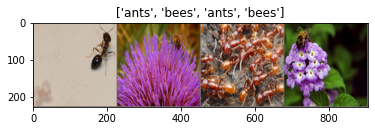

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
inputs, classes = next(iter(train_dataloader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
class MyImageFolder(ImageFolder):
    def __init__(self, root, transforms):
        super().__init__(root, transforms=None)
        self.root = root
        self.transforms_ = transforms

    def __getitem__(self, item):
        img, label = super().__getitem__(item)
        augmented = self.transforms_(image=img)
        img = augmented['image']
        return img, label


# Использование FasetRCNN

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor



Подключаем датасет

In [12]:
!git clone https://github.com/waleedka/coco
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.39 MiB | 5.52 MiB/s, done.
Resolving deltas: 100% (539/539), done.
     |████████████████████████████████| 798kB 2.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 49.1.0
    Uninstalling setuptools-49.1.0:
      Successfully uninstalled setuptools-49.1.0


Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.34.2)
make: Entering directory '/content/coco/PythonAPI'
# install pycocotools to the Python site-packages
python setup.py build_ext install
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
creating build/common
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/inc

In [13]:
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

!unzip *.zip

--2020-07-24 13:01:17--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.241.108
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.241.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  15.8MB/s    in 50s     

2020-07-24 13:02:08 (15.6 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

--2020-07-24 13:02:09--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.107.228
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.107.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.6MB/s    in 16s     

20

In [ ]:
!unzip annotations_trainval2017.zip

In [ ]:
!unzip val2017.zip

In [ ]:
!ls annotations/

In [ ]:
path2json = r'./annotations/instances_val2017.json'
path2data = r'./val2017/'

In [ ]:
from torchvision.datasets import CocoDetection

In [ ]:
class MyCocoDetection(CocoDetection):
    def __init__(self, root, annotation, transforms=None):
        super().__init__(root, annotation)
        self.transforms_ = transforms

    def __getitem__(self, item):
        image, target = super().__getitem__(item)
        if self.transforms_ is not None:
            image = self.transforms_(image)
        return image, target

In [ ]:
transforms_ = transforms.Compose([transforms.ToTensor()])
cocoVal = MyCocoDetection(path2data,path2json, transforms=transforms_)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


In [ ]:
coco_loader = DataLoader(dataset = cocoVal, batch_size=1)

In [ ]:
image, target = next(iter(coco_loader))
image = image.cuda()
target = target

In [ ]:
target

[{'area': tensor([531.8071], dtype=torch.float64),
  'bbox': [tensor([236.9800], dtype=torch.float64),
   tensor([142.5100], dtype=torch.float64),
   tensor([24.7000], dtype=torch.float64),
   tensor([69.5000], dtype=torch.float64)],
  'category_id': tensor([64]),
  'id': tensor([26547]),
  'image_id': tensor([139]),
  'iscrowd': tensor([0]),
  'segmentation': [[tensor([240.8600], dtype=torch.float64),
    tensor([211.3100], dtype=torch.float64),
    tensor([240.1600], dtype=torch.float64),
    tensor([197.1900], dtype=torch.float64),
    tensor([236.9800], dtype=torch.float64),
    tensor([192.2600], dtype=torch.float64),
    tensor([237.3400], dtype=torch.float64),
    tensor([187.6700], dtype=torch.float64),
    tensor([245.8000], dtype=torch.float64),
    tensor([188.0200], dtype=torch.float64),
    tensor([243.3300], dtype=torch.float64),
    tensor([176.0200], dtype=torch.float64),
    tensor([250.3900], dtype=torch.float64),
    tensor([186.9600], dtype=torch.float64),
    tenso

In [ ]:
print(target[0]['bbox'])

[tensor([236.9800], dtype=torch.float64), tensor([142.5100], dtype=torch.float64), tensor([24.7000], dtype=torch.float64), tensor([69.5000], dtype=torch.float64)]


In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).cuda()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [ ]:
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [ ]:
pred = model(image)[0]
print(pred)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


{'boxes': tensor([[291.4145, 216.7152, 352.8481, 317.5725],
        [371.1813, 216.4700, 425.6610, 316.7248],
        [  6.4337, 168.4082, 154.7244, 264.7950],
        [230.8976, 174.7801, 266.7662, 213.8358],
        [425.2516, 159.8455, 464.8459, 299.4899],
        [448.8408, 121.1323, 460.8296, 142.4801],
        [242.0617, 198.2826, 253.6322, 212.6171],
        [166.8864, 233.1043, 186.0566, 266.9825],
        [465.7963, 351.7383, 637.2754, 420.5323],
        [412.4615, 219.7716, 440.9738, 306.8667],
        [334.2527, 178.0546, 368.7292, 225.9879],
        [351.1013, 206.1355, 361.5245, 231.4181],
        [491.8670, 166.3136, 513.3636, 277.3730],
        [445.9541, 167.3671, 511.5264, 289.4648],
        [360.8262, 214.3078, 373.6755, 231.2941],
        [550.4493, 297.0595, 586.5593, 400.1459],
        [337.5818, 201.7821, 347.2739, 215.5094],
        [384.7617, 172.5200, 401.5963, 210.1180],
        [381.9234, 214.6865, 423.2560, 220.4546],
        [314.2650, 193.0583, 323.9116, 2

/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [ ]:
coco_cats = cocoVal.coco.cats

In [ ]:
coco_cats

{1: {'id': 1, 'name': 'person', 'supercategory': 'person'},
 2: {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 3: {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 4: {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 5: {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 6: {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 7: {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 8: {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 9: {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 10: {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 11: {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 13: {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 14: {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 15: {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 16: {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 17: {'id': 17, 'name': 'cat', 'supercategory': 'animal'},

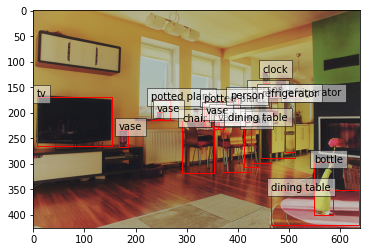

In [ ]:
fig, ax = plt.subplots(1)
ax.imshow(image.cpu().data[0].permute(1,2,0).numpy())

boxes = pred['boxes'].data.cpu().numpy().tolist()
labels = pred['labels'].data.cpu().numpy().tolist()
scores = pred['scores'].data.cpu().numpy().tolist()

for box, label, score in zip(boxes, labels, scores):
    if score>0.7:
        label = coco_cats[label]['name']
        left, bot, right, top = box
        x, y, w, h = [val for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        #ax.text(x, y, "{}, {:.2f}%".format(label, score*100), bbox=dict(facecolor='white', alpha=0.5))
        ax.text(x, y, "{}".format(label), bbox=dict(facecolor='white', alpha=0.5))

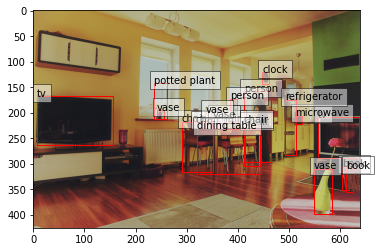

In [ ]:
fig, ax = plt.subplots(1)
ax.imshow(image.cpu().data[0].permute(1,2,0).numpy())
for t in target:
    bbox = t['bbox']
    category = t['category_id']
    label = coco_cats[category.item()]['name']
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, "{}".format(label), bbox=dict(facecolor='white', alpha=0.5))

In [ ]:
model.backbone

BackboneWithFPN(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): FrozenBatchNorm2d()
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): FrozenBatchNorm2d()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FrozenBatchNorm2d()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): FrozenBatchNorm2d()
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): FrozenBatchNorm2d()
        )
      )
      (1): Bottleneck(
        (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=Fa

# Дообучение FasterRCNN

In [ ]:
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

In [ ]:
from torchvision.models import mobilenet_v2

In [ ]:
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

In [ ]:
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=["0"],
                                                output_size=7,
                                                sampling_ratio=2)

In [ ]:
backbone = mobilenet_v2(pretrained=True).features
backbone.out_channels = 1280

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
model1 = FasterRCNN(backbone,
                   num_classes=4,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler).cuda()

In [ ]:
model.train()
for images, targets in train_dataloader:
    loss = model(images, targets)
    loss.backward()
    optimizer.step()

# Домашнее задание

**Задача 1** Обучите FasterRCNN на датасете PascalVOC.

Сколько классов в PascalVOC?

Как записан target?

Вызывает ли датасет VOCDetection ошибки при чтении? Если да, то как их избежать?

In [ ]:
from torchvision.datasets import VOCDetection
import torchvision.transforms as transforms

In [ ]:
transforms_ = transforms.Compose([transforms.ToTensor()])
dataset = VOCDetection(root='Voc', download=True, transforms=transforms_, image_set='train')

**Задача 2** Напишите датасет:

1. который возвращает пару image, target, где image — изображение, а target — словарь {'bbox':[], 'label': }, cодержащий bounding box и лейбл (на картинке находится только один объект для задачи localization. Изображения лежат в папке images, а bounding boxes и метки хранятся annotation.txt по строкам. Пример строки {'image_id':12345, 'bbox':[10,20,100,150], 'label':1} 

2. который возвращает пару image, target, где image — изображение, а target — словарь {'bboxes':[], 'labeles':[]}, в котором записывается, водержащий bounding boxes и лейблы (на картинке несколько объектов, которые должны быть найдены в задаче object detection). Изображения лежат в папке images, а bounding boxes и метки хранятся annotation.txt по строкам. Пример строки:
{'image_id':12345, 'bboxes':[[10,20,100,150],[50,50,70,120]], 'labeles':[1,5]}

3. который возвращает пару изображений image_0, image_1. image_0 и image_1 берутся из папок images_0 и images_1 и имеют одинаковое название вида id12345

4. *который возвращает пару изображений image_0, image_1. Изображения могут браться из одной папки или из разных с вероятностью 0.5. Папки называются images_A и images_B


**Задача 3** Измените датасет из пункта 2 предыдущей задачи так, чтобы он принимал два аргумета: transform и target_transform. transform применяется к изображению, а target_transform к bounding boxes.
Напишите target_transform, которые:
1. сжимают bounding boxes по ширине или высоте
2. отражают bounding boxes по горизонтали (аналог HorizontalFlip)

**Задача 4** Каким будет выход ROI Pooling для выделенных регионов на карте признаков:



![alt text](https://drive.google.com/uc?export=view&id=182yWOpjjoYsF7saH1XpXw0gmi-zO_r9q)

**Задача 5** *Какой будет производная функции по w:
1. f = cos(w\*x)
2. E = cos(w\*x1 - w\*x2)